# Predicting Housing prices


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline

In [48]:
df = pd.read_csv('Housing.csv')

In [49]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [51]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [52]:
df_cat = df.copy()
cat_cols = ['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'mainroad','prefarea','furnishingstatus']

for col in cat_cols:
    df_cat[col] = df_cat[col].map({'yes': 1, 'no': 0})


In [53]:
df_cat.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,NaN
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,NaN
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,NaN
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,NaN
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,NaN
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,NaN
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,NaN
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,NaN
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,NaN
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,NaN


<Axes: >

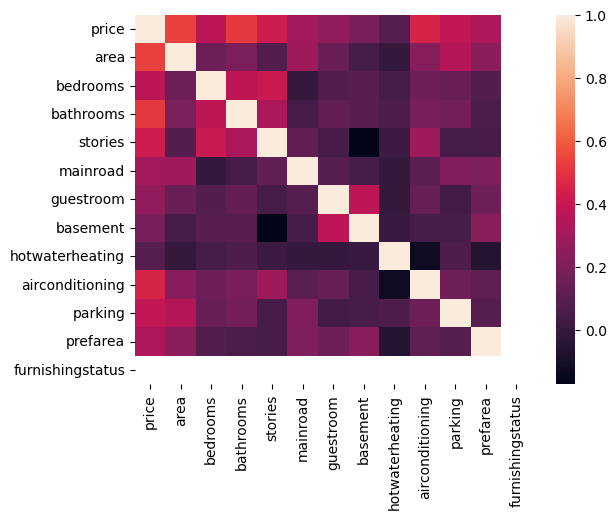

In [54]:
 sns.heatmap(df_cat.corr())

In [55]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


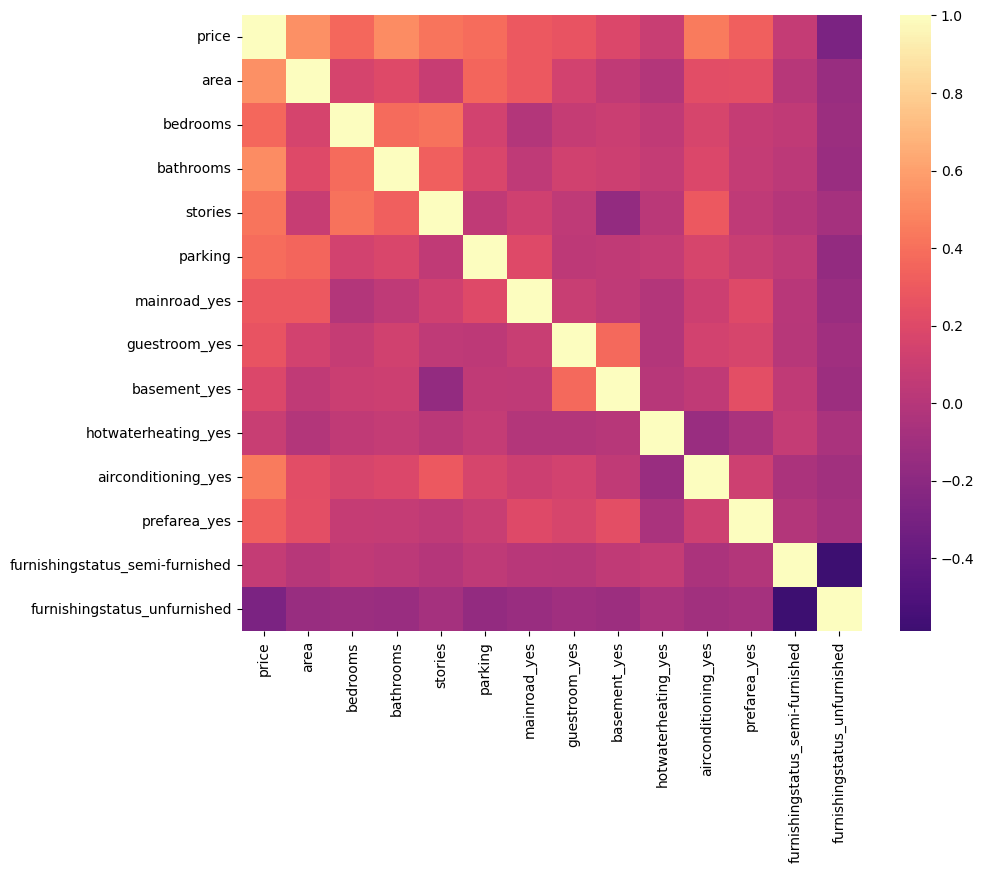

In [56]:
corr = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='magma', center=0)
plt.show()

In [64]:
# # Pipelines for each type
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# Combine both
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
],remainder='passthrough')

model = make_pipeline(preprocessor,RandomForestRegressor(random_state=42))

X = df.drop('price',axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)
mAE = mean_absolute_error(y_test, y_test_pred)
mean_squared_error(y_test, y_test_pred)
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_Square = r2_score(y_test, y_test_pred)

In [65]:
print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))
print('mean absolute error:', round(mAE,4))
print('mean squared error:',round(mse,4))
print('r2_score:',round(r_Square,4))

Model Training Accuracy: 0.95
Model Test Accuracy: 0.6108
mean absolute error: 1028242.7705
mean squared error: 1402637.882
r2_score: 0.6108


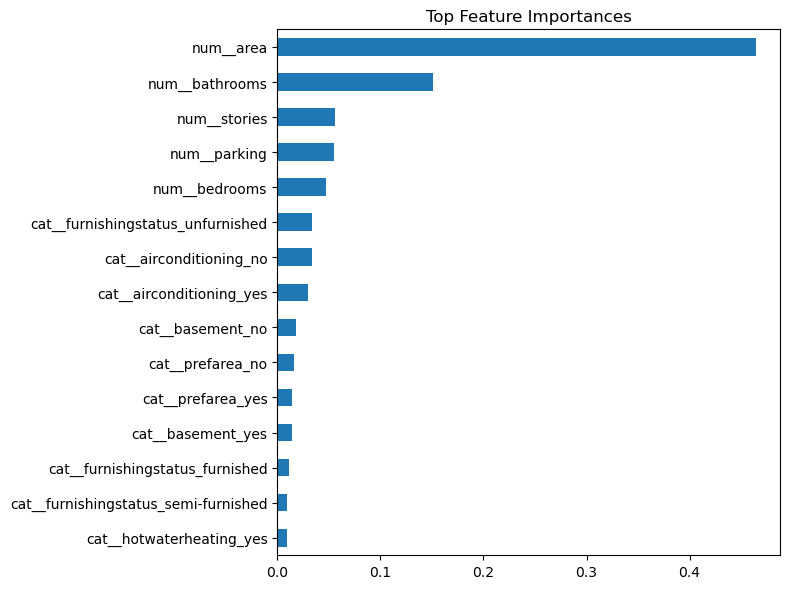

In [69]:
importances = model.named_steps['randomforestregressor'].feature_importances_
feature_names = model.named_steps['columntransformer'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_imp.head(15).plot(kind='barh', figsize=(8, 6))
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [72]:
# Pipelines for each type
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# Combine both
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
],remainder='passthrough')

model_1 = make_pipeline(preprocessor,LinearRegression())

X = df.drop('price',axis=1)
y=df['price']

# Baseline Calculation
y_mean = y.mean()
y_pred_baseline = [y_mean]*len(y)
baseline_mae = mean_absolute_error(y,y_pred_baseline)
print(f'the baseline_mae is = {baseline_mae}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1.fit(X_train,y_train)

y_test_pred = model.predict(X_test)

model_mea = mean_absolute_error(y_test,y_test_pred)
print(f'the mean absolute error of the model is = {model_mea}')
acc_train = model_1.score(X_train,y_train)
acc_test = model_1.score(X_test,y_test)
print("Model_1 Training Accuracy:", round(acc_train, 4))
print("Model_1 Test Accuracy:", round(acc_test, 4))

the baseline_mae is = 1440702.9248043096
the mean absolute error of the model is = 1028242.7704892966
Model_1 Training Accuracy: 0.6859
Model_1 Test Accuracy: 0.6529


<Axes: >

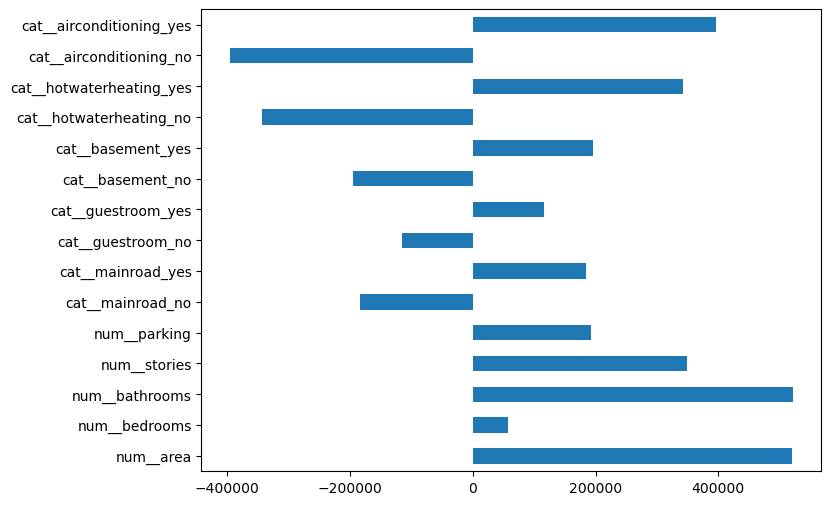

In [73]:
coefficients = model_1.named_steps['linearregression'].coef_
intercept = model_1.named_steps['linearregression'].intercept_
features = preprocessor.get_feature_names_out()
feat_imp = pd.Series(coefficients,index=features)
feat_imp.head(15).plot(kind='barh', figsize=(8, 6))